In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_imgs, train_labels) , (test_imgs, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_imgs.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

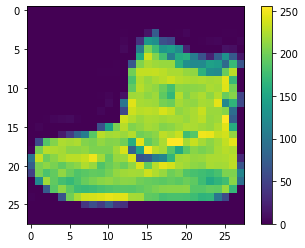

In [ ]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0

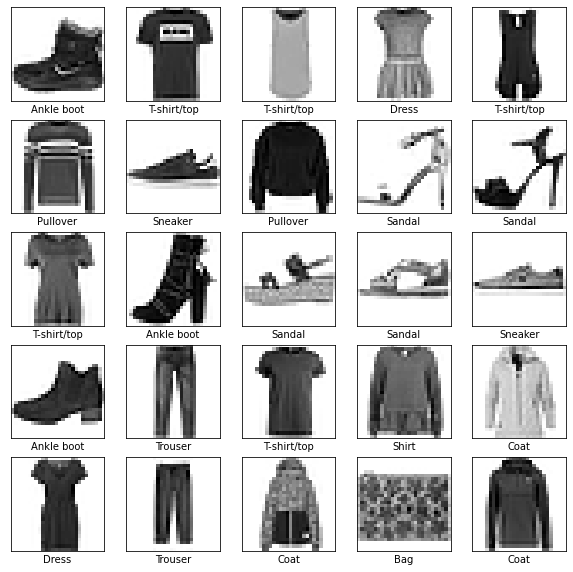

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Set up the layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

Train the model

In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3377 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2823 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.239

Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose= 2)

print('\n===========\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3308 - accuracy: 0.8854 - 528ms/epoch - 2ms/step

Test Accuracy: 0.8853999972343445


Make predictions


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_imgs)

In [ ]:
predictions[0]

array([1.9933982e-07, 5.2082068e-09, 1.9233867e-07, 1.1094270e-08,
       5.0928656e-07, 1.2734988e-03, 2.1135676e-07, 1.9449906e-02,
       1.0067754e-07, 9.7927535e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

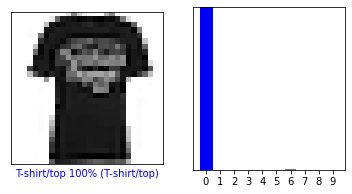

In [ ]:
i = 625
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

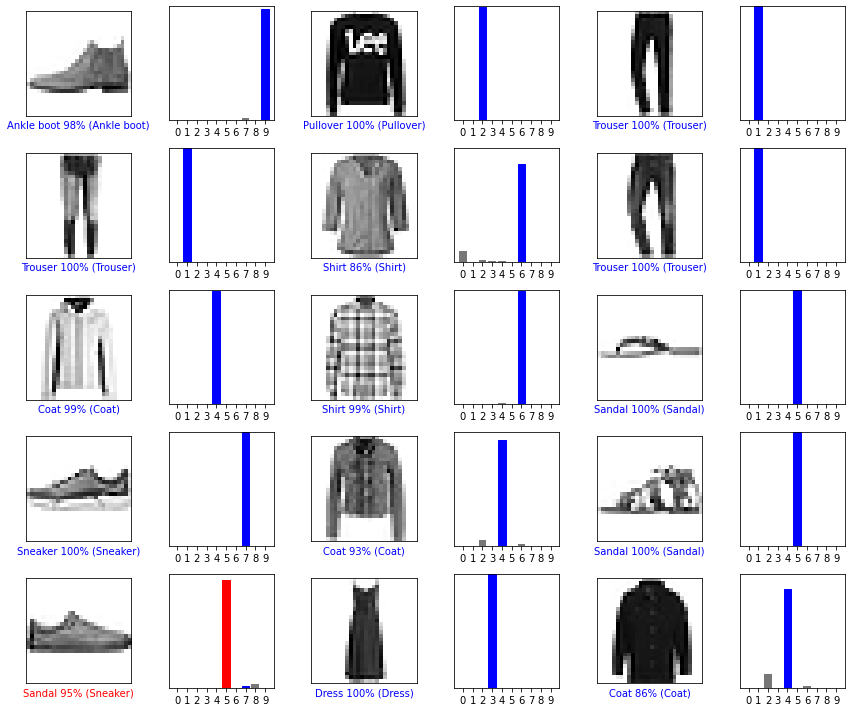

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)


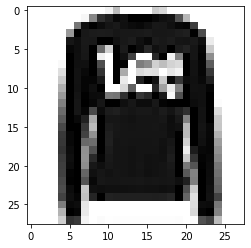

In [ ]:
img = test_imgs[1]

plt.imshow(img, cmap=plt.cm.binary)
print(img.shape)

In [ ]:
img = (np.expand_dims(img, 0))

print(img)

print(img.shape)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.05098039 0.2627451
   0.         0.         0.         0.         0.19607843 0.14901961
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.03137255 0.47058824 0.81960784 0.88627451 0.96862745
   0.92941176 1.         1.         1.         0.96862745 0.93333333
   0.92156863 0.6745098  0.28235294 0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.5372549  0.9372549  0.98823529 0.95294118 0.91764706 0.89803922
   0.93333333 0.95686275 0.96470588 0.94117647 0.90196078 0.90980392
   0.9372549  0.97254902 0.98431373 0.76078431 0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.4
   1.         0

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.1375086e-06 2.6327500e-13 9.9770892e-01 3.7143508e-10 9.3147537e-04
  4.0818851e-13 1.3504253e-03 2.5337820e-15 2.4177244e-11 2.2125537e-13]]


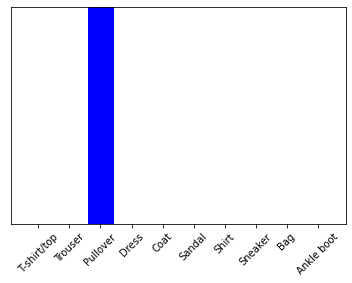

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
batch = np.array([test_imgs[1], test_imgs[2]])

batch = np.append(batch, np.array([test_imgs[3]]), 0)

print(batch.shape)

print(len(test_imgs))

print(test_imgs.shape)

print(test_imgs[1].shape)

(3, 28, 28)
10000
(10000, 28, 28)
(28, 28)


In [ ]:
predictions_multiple = probability_model.predict(batch)

print(predictions_multiple)

[[9.1375168e-06 2.6327600e-13 9.9770892e-01 3.7143577e-10 9.3147624e-04
  4.0819163e-13 1.3504266e-03 2.5337917e-15 2.4177337e-11 2.2125623e-13]
 [7.5151404e-12 1.0000000e+00 6.8121859e-14 1.1870795e-10 4.3463609e-12
  5.9910882e-20 1.2818747e-11 5.3231865e-25 4.9975998e-14 4.3738412e-18]
 [4.1637178e-09 9.9999845e-01 2.9926735e-11 1.5950678e-06 1.0127333e-09
  3.1199005e-14 2.5057133e-08 5.5736557e-21 1.7643046e-12 1.6128510e-14]]


In [ ]:
model.save('fashion_minist')

INFO:tensorflow:Assets written to: fashion_minist/assets
